# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Oraux-CentraleSupélec-PSI---Juin-2017" data-toc-modified-id="Oraux-CentraleSupélec-PSI---Juin-2017-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Oraux CentraleSupélec PSI - Juin 2017</a></div><div class="lev2 toc-item"><a href="#Remarques-préliminaires" data-toc-modified-id="Remarques-préliminaires-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Remarques préliminaires</a></div><div class="lev2 toc-item"><a href="#Planche-158" data-toc-modified-id="Planche-158-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Planche 158</a></div><div class="lev2 toc-item"><a href="#Planche-162" data-toc-modified-id="Planche-162-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Planche 162</a></div><div class="lev2 toc-item"><a href="#Planche-170" data-toc-modified-id="Planche-170-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Planche 170</a></div><div class="lev1 toc-item"><a href="#À-voir-aussi" data-toc-modified-id="À-voir-aussi-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>À voir aussi</a></div><div class="lev2 toc-item"><a href="#Les-oraux---(exercices-de-maths-avec-Python)" data-toc-modified-id="Les-oraux---(exercices-de-maths-avec-Python)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><a href="http://perso.crans.org/besson/infoMP/oraux/solutions/" target="_blank">Les oraux</a>   <em>(exercices de maths avec Python)</em></a></div><div class="lev2 toc-item"><a href="#Fiches-de-révisions-pour-les-oraux" data-toc-modified-id="Fiches-de-révisions-pour-les-oraux-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Fiches de révisions <em>pour les oraux</em></a></div><div class="lev2 toc-item"><a href="#Quelques-exemples-de-sujets-d'oraux-corrigés" data-toc-modified-id="Quelques-exemples-de-sujets-d'oraux-corrigés-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Quelques exemples de sujets <em>d'oraux</em> corrigés</a></div><div class="lev2 toc-item"><a href="#D'autres-notebooks-?" data-toc-modified-id="D'autres-notebooks-?-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>D'autres notebooks ?</a></div>

# Oraux CentraleSupélec PSI - Juin 2017

- Ce [notebook Jupyter](https://www.jupyter.org) est une proposition de correction, en [Python 3](https://www.python.org/), d'exercices d'annales de l'épreuve "maths-info" du [concours CentraleSupélec](http://www.concours-centrale-supelec.fr/), filière PSI.
- Les exercices viennent de l'[Officiel de la Taupe](http://odlt.fr/), [2016](http://www.odlt.fr/Oraux_2016.pdf) (planches 157 à 173, page 23).
- Ce document a été écrit par [Lilian Besson](http://perso.crans.org/besson/), et est disponible en ligne [sur mon site](http://perso.crans.org/besson/infoMP/Oraux_CentraleSupélec_PSI__Juin_2017.html).

## Remarques préliminaires
- Les exercices sans Python ne sont pas traités.
- Les exercices avec Python utilisent Python 3, [numpy](http://numpy.org), [matplotlib](http://matplotlib.org), [scipy](http://scipy.org) et [sympy](http://sympy.org), et essaient d'être résolus le plus simplement et le plus rapidement possible. L'efficacité (algorithmique, en terme de mémoire et de temps de calcul), n'est *pas* une priorité. La concision et simplicité de la solution proposée est prioritaire.
- Les modules Python utilisés sont aux [versions suivantes](https://github.com/rasbt/watermark) :

In [1]:
%load_ext watermark
%watermark -v -m -p scipy,numpy,matplotlib,sympy,seaborn -g

CPython 3.5.3
IPython 6.1.0

scipy 0.19.0
numpy 1.12.1
matplotlib 2.0.2
sympy 1.0
seaborn 0.7.1

compiler   : GCC 6.3.0 20170118
system     : Linux
release    : 4.10.0-21-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit
Git hash   : c4118c39f038f15e7dcde2fa4d6a8df0060ae9e4


In [2]:
import numpy as np
import numpy.linalg as LA
import matplotlib as mpl  # inutile
import matplotlib.pyplot as plt
import scipy as sc        # pas très utile

Pour avoir de belles figures :

In [3]:
import seaborn as sns
sns.set(context="notebook", style="darkgrid", palette="hls", font="sans-serif", font_scale=1.4)
mpl.rcParams['figure.figsize'] = (19.80, 10.80)

----
## Planche 158

On donne $f_n(t) = \frac{1 - \cos\left(\frac{t}{n}\right)}{t^2(1+t^2)}$.

- Tracer avec Python les courbes de $f_n$ pour $n \in \{1, \dots, 10\}$, ainsi que la fonction constante $y = \frac{1}{2}$, sur $]0, \pi[$.

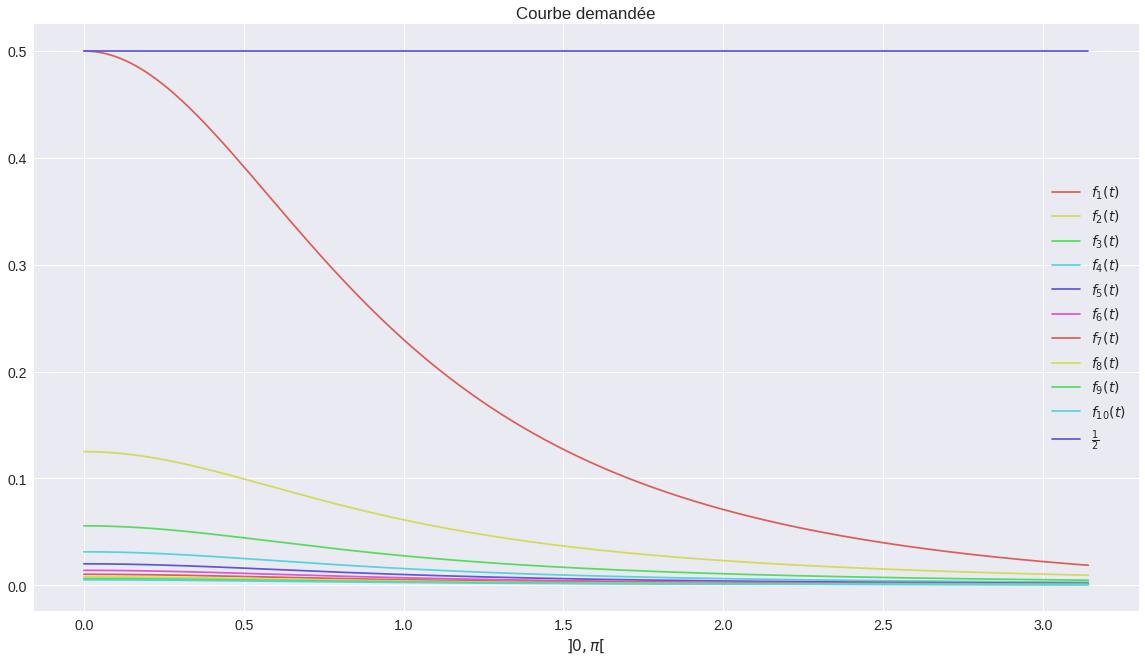

In [4]:
def f(n, t):
    return (1 - np.cos(t / n)) / (t**2 *  (1 + t**2))

def y(t):
    return 0.5 * np.ones_like(t)

eps = 1e-5
t = np.linspace(0 + eps, np.pi - eps, 1000)
plt.figure()
for n in range(1, 1 + 10):
    plt.plot(t, f(n, t), label=r'$f_{%i}(t)$' % n)
plt.plot(t, y(t), label=r'$\frac{1}{2}$')
plt.legend()
plt.title("Courbe demandée")
plt.xlabel(r"$]0, \pi[$")
plt.show()

$f_n(t)$ est bien sûr intégrable sur $[1, +\infty]$, mais c'est moins évident sur $]0, 1]$.
La courbe précédente laisse suggérer qu'elle l'est, il faudrait le prouver.

(un développement limité montre qu'en $0$, $f_n(t)$ est prolongeable par continuité en fait)

- Calculer les $30$ premiers termes de la suite de terme général $u_n = \int_0^{+\infty} f_n(t) \mathrm{d}t$.

In [6]:
from scipy.integrate import quad as integral

def u_n(n):
    def f_n(t):
        return f(n, t)
    return integral(f_n, 0, np.inf)[0]

for n in range(1, 1 + 30):
    print("- Pour n =", n, "\t u_n =", u_n(n))

- Pour n = 1 	 u_n = 0.5778636758673165
- Pour n = 2 	 u_n = 0.1673379686913233
- Pour n = 3 	 u_n = 0.07832719999247961
- Pour n = 4 	 u_n = 0.04524016647527334
- Pour n = 5 	 u_n = 0.0294221986520279
- Pour n = 6 	 u_n = 0.02065344571531756
- Pour n = 7 	 u_n = 0.015291770261272906
- Pour n = 8 	 u_n = 0.011776107184161803
- Pour n = 9 	 u_n = 0.009346910316513675
- Pour n = 10 	 u_n = 0.007598599569591147
- Pour n = 11 	 u_n = 0.006298591120713312
- Pour n = 12 	 u_n = 0.005305713621776519
- Pour n = 13 	 u_n = 0.004530420616071271
- Pour n = 14 	 u_n = 0.003913403332067795
- Pour n = 15 	 u_n = 0.0034143635712630925
- Pour n = 16 	 u_n = 0.00300503233562181
- Pour n = 17 	 u_n = 0.002665127564756733
- Pour n = 18 	 u_n = 0.0023797953460884366
- Pour n = 19 	 u_n = 0.002137946272152306
- Pour n = 20 	 u_n = 0.0019311752431841328
- Pour n = 21 	 u_n = 0.0017530128954453457
- Pour n = 22 	 u_n = 0.0015984135117823957
- Pour n = 23 	 u_n = 0.001463398620721792
- Pour n = 24 	 u_n = 0.0

Le terme $u_n$ semble tendre vers $0$ pour $n\to +\infty$.
On le prouverait avec le théorème de convergence dominée (à faire).

Soit $F(x) = \int_0^{+\infty} \frac{1 - \cos(xt)}{t^2 (1+t^2)} \mathrm{d}t$.

- L'intégrande est évidemment intégrable sur $[1,+\infty[$ par comparaison (et comme $t\mapsto \frac{1}{t^4}$ l'est).
- Sur $]0,1]$, $1-\cos(xt) \sim_{x\to 0} \frac{(xt)^2}{2} $, donc l'intégrande est $\sim \frac{x^2}{2(1+t^2)}$ qui est bien intégrable (la constante $\frac{x^2}{2}$ sort de l'intégrale).
Donc $F$ est bien définie sur $R_+^*$.

Elle est continue par application directe du théorème de continuité sous le signe intégrale.

Elle est prolongeable par continuité en $0$, par $F(0) := 0$ grâce à l'observation précédente : $F(x) \sim \frac{x^2}{2} \int_0^{+\infty} \frac{1}{1+t^2} \mathrm{d}t \to 0$ quand $x\to 0$.

/usr/local/lib/python3.5/dist-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


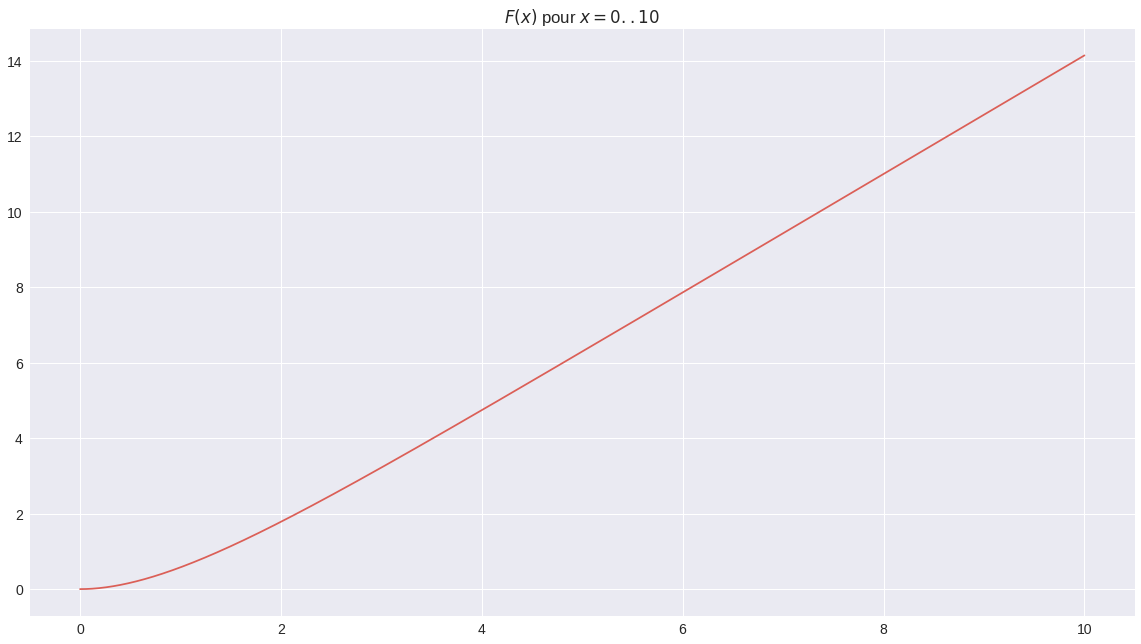

In [7]:
def F(x):
    def f_inf(t):
        return (1 - np.cos(x * t)) / (t**2 * (1 + t**2))
    return integral(f_inf, 0, np.inf)[0]

eps = 1e-4
x = np.linspace(0 + eps, 10, 1000)
plt.figure()
plt.plot(x, np.vectorize(F)(x))
plt.title("$F(x)$ pour $x = 0 .. 10$")
plt.show()

On constate sur la figure que $F$ est bien prolongeable par continuité en $0$.

On montrerait aussi que $F$ est de classe $\mathcal{C}^1$ facilement, par application directe du théorème de dérivation généralisée sous le signe intégral.

----
## Planche 162

Soit $(P_n)_{n\geq 0}$ une suite de polynômes définis par $P_0 = 1$, $P_1 = 2X$ et $P_{n+1} = 2 X P_n - P_{n-1}$. Calculons $P_2,\dots,P_8$.

On pourrait tout faire avec des listes gérées manuellement, mais c'est assez compliqué.

Il vaut mieux aller vite, en utilisant le module [numpy.polynomial](https://docs.scipy.org/doc/numpy/reference/routines.polynomials.classes.html).

In [8]:
# Ce morceau est juste là pour avoir un joli rendu
def Polynomial_to_LaTeX(p):
    """ Small function to print nicely the polynomial p as we write it in maths, in LaTeX code.
    
    - Source: https://nbviewer.jupyter.org/github/Naereen/notebooks/blob/master/Demonstration%20of%20numpy.polynomial.Polynomial%20and%20nice%20display%20with%20LaTeX%20and%20MathJax%20%28python3%29.ipynb
    """
    coefs = p.coef  # List of coefficient, sorted by increasing degrees
    res = ""  # The resulting string
    for i, a in enumerate(coefs):
        if int(a) == a:  # Remove the trailing .0
            a = int(a)
        if i == 0:  # First coefficient, no need for X
            if a > 0:
                res += "{a} + ".format(a=a)
            elif a < 0:  # Negative a is printed like (a)
                res += "({a}) + ".format(a=a)
            # a = 0 is not displayed 
        elif i == 1:  # Second coefficient, only X and not X**i
            if a == 1:  # a = 1 does not need to be displayed
                res += "X + "
            elif a > 0:
                res += "{a} \;X + ".format(a=a)
            elif a < 0:
                res += "({a}) \;X + ".format(a=a)
        else:
            if a == 1:
                # A special care needs to be addressed to put the exponent in {..} in LaTeX
                res += "X^{i} + ".format(i="{%d}" % i)
            elif a > 0:
                res += "{a} \;X^{i} + ".format(a=a, i="{%d}" % i)
            elif a < 0:
                res += "({a}) \;X^{i} + ".format(a=a, i="{%d}" % i)
    if res == "":
        res = "0000"
    return "$" + res[:-3] + "$"

def setup_prrint():
    ip = get_ipython()
    latex_formatter = ip.display_formatter.formatters['text/latex']
    latex_formatter.for_type_by_name('numpy.polynomial.polynomial',
                                     'Polynomial', Polynomial_to_LaTeX)

setup_prrint()

Je recommande d'importer `numpy.polynomial.Polynomial` et de l'appeller `P`.
Définir directement le monôme $X$ comme `P([0, 1])`, donné par la liste de ses coefficients $[a_k]_{0 \leq k \leq \delta(X)} = [0, 1]$.

In [9]:
from numpy.polynomial import Polynomial as P
X = P([0, 1])
X

Polynomial([ 0.,  1.], [-1,  1], [-1,  1])

Ensuite, on peut rapidement écrire une fonction, qui donne $P_n$ pour un $n \geq 0$.
Pas besoin d'être malin, on recalcule tout dans la fonction.

- `Pnm1` signifie $P_{n - 1}$
- `Pnext` signifie $P_{n + 1}$

In [10]:
def P_n(n):
    P0 = P([1])
    P1 = P([0, 2])
    Pnm1, Pn = P0, P1
    for i in range(n):
        Pnext = (2 * X * Pn) - Pnm1
        Pnm1, Pn = Pn, Pnext
    return Pnm1

for n in range(0, 1 + 8):
    print("Pour n =", n, "P_n =")
    P_n(n)

Pour n = 0 P_n =


Polynomial([ 1.], [-1,  1], [-1,  1])

Pour n = 1 P_n =


Polynomial([ 0.,  2.], [-1,  1], [-1,  1])

Pour n = 2 P_n =


Polynomial([-1.,  0.,  4.], [-1.,  1.], [-1.,  1.])

Pour n = 3 P_n =


Polynomial([ 0., -4.,  0.,  8.], [-1.,  1.], [-1.,  1.])

Pour n = 4 P_n =


Polynomial([  1.,   0., -12.,   0.,  16.], [-1.,  1.], [-1.,  1.])

Pour n = 5 P_n =


Polynomial([  0.,   6.,   0., -32.,   0.,  32.], [-1.,  1.], [-1.,  1.])

Pour n = 6 P_n =


Polynomial([ -1.,   0.,  24.,   0., -80.,   0.,  64.], [-1.,  1.], [-1.,  1.])

Pour n = 7 P_n =


Polynomial([   0.,   -8.,    0.,   80.,    0., -192.,    0.,  128.], [-1.,  1.], [-1.,  1.])

Pour n = 8 P_n =


Polynomial([   1.,    0.,  -40.,    0.,  240.,    0., -448.,    0.,  256.], [-1.,  1.], [-1.,  1.])

Premières observations :
- Le dégré de $P_n$ est $n$,
- Son coefficient dominant est $2^{n-1}$ si $n>0$,
- Sa parité est impaire si $n$ est pair, paire si $n$ est impair.

Ces trois points se montrent assez rapidement par récurrence simple, à partir de $P_0,P_1$ et la relation de récurrence définissant $P_n$.

On vérifie mathématiquement que $\langle P, Q \rangle := \frac{2}{\pi} \int_{-1}^{1} \sqrt{1-t^2} P(t) Q(t) \mathrm{d}t$ est un produit scalaire pour les polynômes réels.
(il est évidemment bien défini puisque la racine carrée existe, et que les fonctions intégrées sont de continues sur $[-1,1]$, symétrique, positif si $P=Q$, et il est défini parce que $P^2(t) \geq 0$).

Calculons $\langle P_i, P_j \rangle$ pour $0 \leq i,j \leq 8$.
L'intégration est faite *numériquement*, avec [`scipy.integrate.quad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html).

In [11]:
from scipy.integrate import quad

def produit_scalaire(P, Q):
    def f(t):
        return np.sqrt(1 - t**2) * P(t) * Q(t)
    return (2 / np.pi) * quad(f, -1, 1)[0]

In [12]:
# on calcule qu'une seule fois
P_n_s = [P_n(n) for n in range(0, 1 + 8)]

for i in range(1, 1 + 8):
    for j in range(i, 1 + 8):
        Pi, Pj = P_n_s[i], P_n_s[j]
        ps = np.round(produit_scalaire(Pi, Pj), 8)
        print("< P_{}, P_{} > = {:.3g}".format(i, j, ps))

< P_1, P_1 > = 1
< P_1, P_2 > = 0
< P_1, P_3 > = -0
< P_1, P_4 > = 0
< P_1, P_5 > = -0
< P_1, P_6 > = 0
< P_1, P_7 > = -0
< P_1, P_8 > = 0
< P_2, P_2 > = 1
< P_2, P_3 > = 0
< P_2, P_4 > = -0
< P_2, P_5 > = 0
< P_2, P_6 > = -0
< P_2, P_7 > = 0
< P_2, P_8 > = -0
< P_3, P_3 > = 1
< P_3, P_4 > = 0
< P_3, P_5 > = -0
< P_3, P_6 > = 0
< P_3, P_7 > = -0
< P_3, P_8 > = 0
< P_4, P_4 > = 1
< P_4, P_5 > = 0
< P_4, P_6 > = -0
< P_4, P_7 > = 0
< P_4, P_8 > = -0
< P_5, P_5 > = 1
< P_5, P_6 > = 0
< P_5, P_7 > = -0
< P_5, P_8 > = 0
< P_6, P_6 > = 1
< P_6, P_7 > = 0
< P_6, P_8 > = -0
< P_7, P_7 > = 1
< P_7, P_8 > = 0
< P_8, P_8 > = 1


In [15]:
produits_scalaires = np.zeros((8, 8))

for i in range(1, 1 + 8):
    for j in range(i, 1 + 8):
        Pi, Pj = P_n_s[i], P_n_s[j]
        produits_scalaires[i - 1, j - 1] = np.round(produit_scalaire(Pi, Pj), 8)

produits_scalaires.astype(int)

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

La famille $(P_i)_{0 \leq i \leq 8}\;$  est *orthogonale*.
(les `-0` sont des `0`, la différence vient des erreurs d'arrondis).

Soit $\Phi(P) = 3XP' - (1-X^2)P''$ (erreur dans l'énoncé, le deuxième terme est évidemment $P''$ et non $P'$).
Elle conserve (ou diminue) le degré de $P$.

In [16]:
def Phi(P):
    return 3 * X * P.deriv() - (1 - X**2) * P.deriv(2)

On calcule sa matrice de passage, dans la base $(P_i)_{1\leq i \leq 8}$ :

In [17]:
# on calcule qu'une seule fois
P_n_s = [P_n(n) for n in range(0, 1 + 8)]

matrice_Phi = [
    [
        np.round(produit_scalaire(Phi(P_n_s[i]), P_n_s[j]), 8)
        for i in range(1, 1 + 8)
    ] for j in range(1, 1 + 8)
]
matrice_Phi = np.array(matrice_Phi, dtype=int)

In [18]:
matrice_Phi.shape
matrice_Phi

(8, 8)

array([[ 3,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 24,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 63,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 80]])

Elle est diagonale ! Et trivialement inversible !

In [19]:
from scipy.linalg import det
det(matrice_Phi)

73156608000.0

Cette matrice est inversible, donc dans la base $(P_i)_{1\leq i \leq 8}$, l'application linéaire $\Phi$ est une bijection.

On peut même dire plus : en renormalisant les $P_i$, on peut faire de $\Phi$ l'identité...

In [30]:
P_n_s_normalises = np.asarray(P_n_s[1:]) / np.sqrt(matrice_Phi.diagonal())

matrice_Phi_normalise = [
    [
        np.round(produit_scalaire(Phi(P_n_s_normalises[i - 1]), P_n_s_normalises[j - 1]), 8)
        for i in range(1, 1 + 8)
    ] for j in range(1, 1 + 8)
]
matrice_Phi_normalise = np.array(matrice_Phi_normalise)

matrice_Phi_normalise.astype(int)

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

On peut utiliser ce fait pour montrer, par deux intégrations par parties, le résultat annoncé sur l'orthogonalité de la famille $(P_i)_{1\leq i \leq 8}\;$.

----
## Planche 170

On étudie le comportement d'une particule évoluant sur 4 états, avec certaines probabilités :

![centrale2017002_planche170.png](centrale2017002_planche170.png)

On fixe la constante $p = \frac12$ dès maintenant, on définit la matrice de transition $A$, telle que définie un peu après dans l'exercice.

Les états sont représentés par `[0, 1, 2, 3]` plutôt que $A_0, A_1, A_2, A_3$.

In [35]:
p = 0.5

A = np.array([
    [1, 0, 0, 0],
    [p, 0, 1-p, 0],
    [0, p, 0, 1-p],
    [0, 0, 0, 1]
])
etats = [0, 1, 2, 3]

In [36]:
import numpy.random as rd

Une transition se fait en choisissant un état $x_{n+1}$ parmi $\{0, 1, 2, 3\}$, avec probabilité $\mathbb{P}(x_{n+1} = k) = A_{x_n, k}$.
La fonction [`numpy.random.choice`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html) fait ça directement.

In [37]:
def une_transition(xn):
    return rd.choice(etats, p = A[xn])

In [44]:
une_transition(0)
une_transition(1)
une_transition(2)
une_transition(3)

0

0

3

3

On peut écrire la fonction à la main, comme :

In [45]:
def une_transition_longue(xn):
    if xn == 0 or xn == 3:
        return xn
    elif xn == 1:
        if rd.random() < p:
            return 0  # avec probabilité p
        else:
            return 2  # avec probabilité 1-p
    elif xn == 2:
        if rd.random() < p:
            return 1
        else:
            return 3

In [46]:
une_transition_longue(0)
une_transition_longue(1)
une_transition_longue(2)
une_transition_longue(3)

0

2

1

3

Faire plusieurs transitions se fait juste en appliquant la même fonction $n$ fois.

In [50]:
def n_transitions(n, x0):
    x = x0
    for i in range(n):
        x = une_transition(x)
    return x

In [51]:
n_transitions(10, 0)
n_transitions(10, 1)
n_transitions(10, 2)
n_transitions(10, 3)

0

0

0

3

Faisons $N=1000$ répétitions de cette expérience, à l'horizon disons $n=100$.

In [52]:
n = 100
N = 1000

def histogramme(n, N, x0):
    observations = np.zeros(len(etats))
    for experience in range(N):
        obs = n_transitions(n, x0)
        observations[obs] += 1
    plt.bar(etats, observations)
    plt.show()

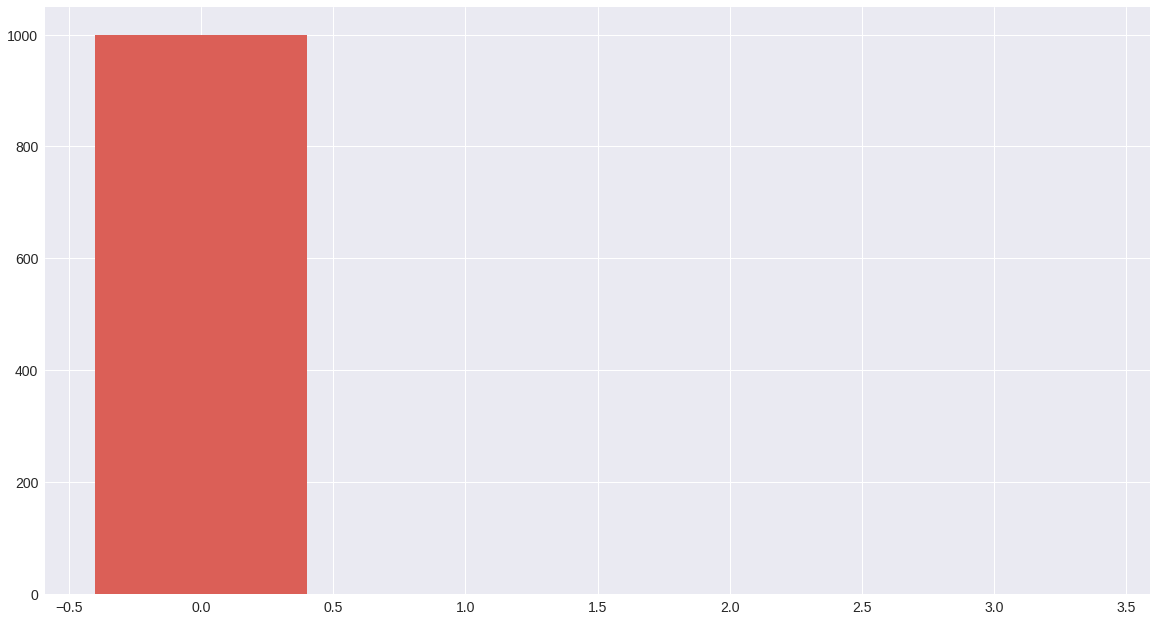

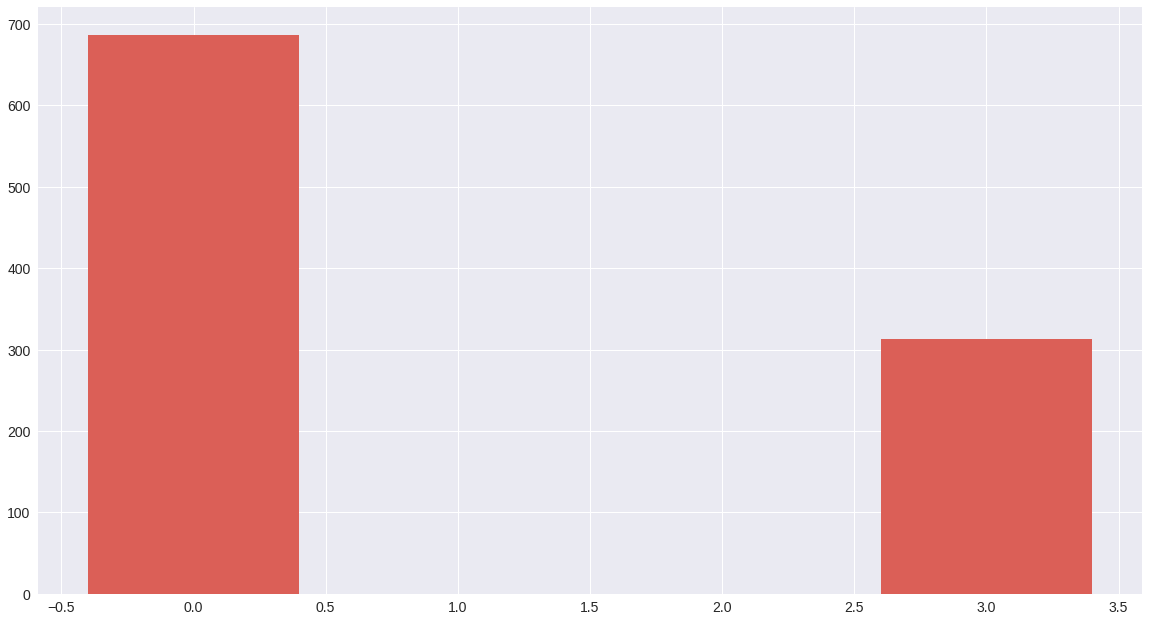

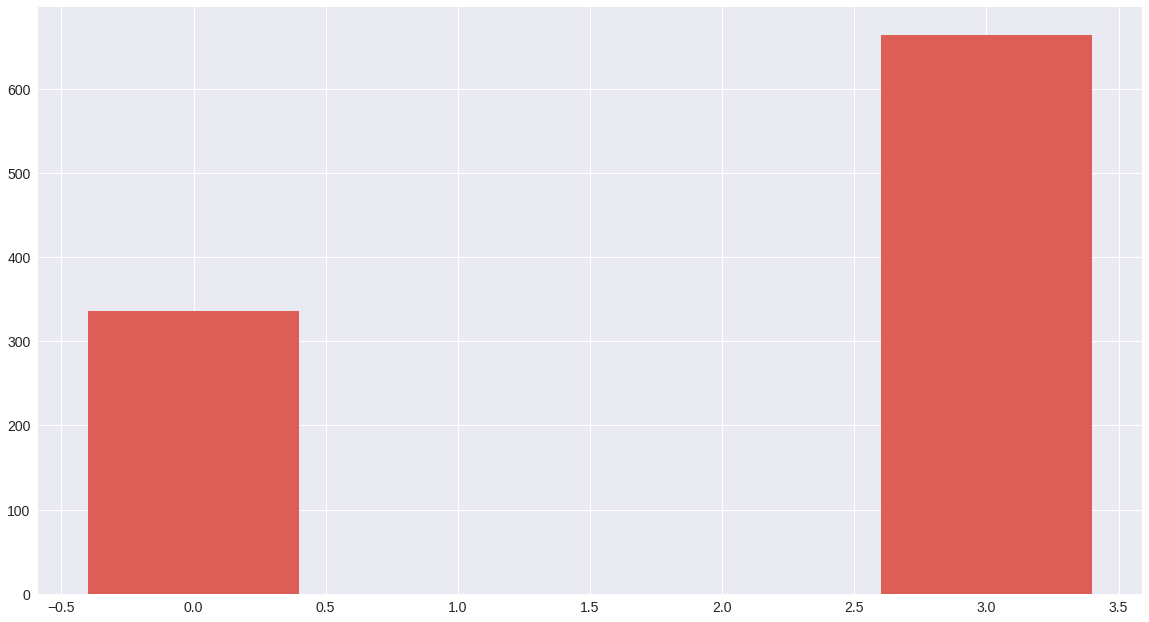

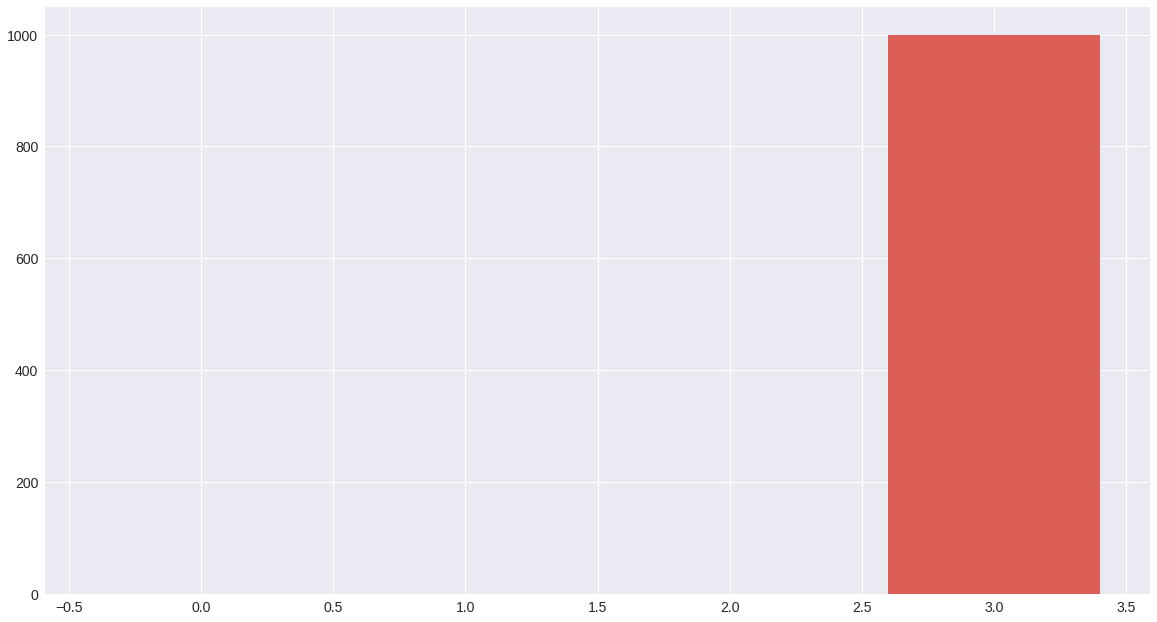

In [54]:
histogramme(n, N, 0)
histogramme(n, N, 1)
histogramme(n, N, 2)
histogramme(n, N, 3)

Mathématiquement, sur papier on calcule le polynôme caractéristique de $A$, et on vérifie qu'il est scindé ssi $p \neq 0, 1$ (mais pas à racine simple).

Pour diagonaliser, on utile le module `numpy.linalg`, et la fonction [`numpy.linalg.eig`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html).

In [56]:
from numpy import linalg as LA

In [87]:
A = A.T
A

array([[ 1. ,  0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0.5,  0. ],
       [ 0. ,  0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0.5,  1. ]])

In [88]:
spectre, matricePassage = LA.eig(A)
spectre
matricePassage

array([ 1. ,  1. ,  0.5, -0.5])

array([[ 1.        ,  0.        , -0.5       , -0.2236068 ],
       [ 0.        ,  0.        ,  0.5       ,  0.67082039],
       [ 0.        ,  0.        ,  0.5       , -0.67082039],
       [ 0.        ,  1.        , -0.5       ,  0.2236068 ]])

Ici, on vérifie que le spectre contient deux fois la valeur propre $1$, qui vient des deux puits $A_0,A_3$, et deux valeurs symétriques.

On peut vérifier que $A = P \Lambda P^{-1}$

In [89]:
Lambda = np.diag(spectre)
matricePassageinv = LA.inv(matricePassage)

# avec Python >= 3.6
matricePassage @ Lambda @ matricePassageinv
# avant 3.6
matricePassage.dot(Lambda.dot(matricePassageinv))

array([[  1.00000000e+00,   5.00000000e-01,  -6.14248029e-17,
          0.00000000e+00],
       [  0.00000000e+00,  -4.08433854e-17,   5.00000000e-01,
          0.00000000e+00],
       [  0.00000000e+00,   5.00000000e-01,   1.34656917e-16,
          0.00000000e+00],
       [  0.00000000e+00,   5.78726134e-17,   5.00000000e-01,
          1.00000000e+00]])

array([[  1.00000000e+00,   5.00000000e-01,  -9.74554924e-17,
          0.00000000e+00],
       [  0.00000000e+00,  -4.49809423e-17,   5.00000000e-01,
          0.00000000e+00],
       [  0.00000000e+00,   5.00000000e-01,   1.30519360e-16,
          0.00000000e+00],
       [  0.00000000e+00,   4.95974995e-17,   5.00000000e-01,
          1.00000000e+00]])

Sans erreur d'arrondis, ça donne :

In [90]:
np.round(matricePassage @ Lambda @ matricePassageinv, 3)
np.round(matricePassage.dot(Lambda.dot(matricePassageinv)), 3)

np.all(np.round(matricePassage @ Lambda @ matricePassageinv, 3) == A)

array([[ 1. ,  0.5, -0. ,  0. ],
       [ 0. , -0. ,  0.5,  0. ],
       [ 0. ,  0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0.5,  1. ]])

array([[ 1. ,  0.5, -0. ,  0. ],
       [ 0. , -0. ,  0.5,  0. ],
       [ 0. ,  0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0.5,  1. ]])

True

On peut ensuite calculer $\lim_{n\to\infty} X_n$ en calculant
$P \Lambda' P^{-1} X_0$ si $\Lambda' := \lim_{n\to\infty} \Lambda^n = \mathrm{Diag}(\lim_{n\to\infty} \lambda_i^n)$ qui existe bien puisque $\mathrm{Sp}(A) = \{1, \pm\sqrt{p(1-p)}\} \subset [-1,1]$.

In [91]:
def limite_inf(t):
    if t <= -1:
        raise ValueError("Pas de limite")
    elif -1 < t < 1:
        return 0
    elif t == 1:
        return 1
    else:
        return np.inf

LambdaInf = np.diag([limite_inf(lmbda) for lmbda in spectre])
LambdaInf

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [93]:
for x0 in etats:
    X0 = np.zeros(len(etats))
    X0[x0] = 1
    print("Pour X0 =", X0)
    Xinf = (matricePassage @ LambdaInf @ matricePassageinv) @ X0
    print("    => limite Xn pour n -> oo =", Xinf)

Pour X0 = [ 1.  0.  0.  0.]
    => limite Xn pour n -> oo = [ 1.  0.  0.  0.]
Pour X0 = [ 0.  1.  0.  0.]
    => limite Xn pour n -> oo = [ 0.66666667  0.          0.          0.33333333]
Pour X0 = [ 0.  0.  1.  0.]
    => limite Xn pour n -> oo = [ 0.33333333  0.          0.          0.66666667]
Pour X0 = [ 0.  0.  0.  1.]
    => limite Xn pour n -> oo = [ 0.  0.  0.  1.]


Ça correspond exactement aux histogrammes obtenus plus haut.
Peu importe l'état initial, la particule finira dans un des deux puits.
(C'est ce qu'on appelle des états absorbants)

----
# À voir aussi

## [Les oraux](http://perso.crans.org/besson/infoMP/oraux/solutions/)   *(exercices de maths avec Python)*

Se préparer aux oraux de ["maths avec Python" (maths 2)](http://www.concours-centrale-supelec.fr/CentraleSupelec/MultiY/C2015/#oMat2) du concours Centrale Supélec peut être utile.

Après les écrits et la fin de l'année, pour ceux qui seront admissibles à Centrale-Supélec, ils vous restera <b>les oraux</b> (le concours Centrale-Supélec a un <a title="Quelques exemples d'exercices sur le site du concours Centrale-Supélec" href="http://www.concours-centrale-supelec.fr/CentraleSupelec/MultiY/C2015/#oMat2">oral d'informatique</a>, et un peu d'algorithmique et de Python peuvent en théorie être demandés à chaque oral de maths et de SI).

Je vous invite à lire [cette page avec attention](http://www.concours-centrale-supelec.fr/CentraleSupelec/MultiY/C2015/#oMat2), et à jeter un œil aux documents mis à disposition :

## Fiches de révisions *pour les oraux*

1. [Calcul matriciel](http://www.concours-centrale-supelec.fr/CentraleSupelec/MultiY/C2015/Python-matrices.pdf), avec [numpy](https://docs.scipy.org/doc/numpy/) et [numpy.linalg](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html),
2. [Réalisation de tracés](http://www.concours-centrale-supelec.fr/CentraleSupelec/MultiY/C2015/Python-plot.pdf), avec [matplotlib](http://matplotlib.org/users/beginner.html),
3. [Analyse numérique](http://www.concours-centrale-supelec.fr/CentraleSupelec/MultiY/C2015/Python-AN.pdf), avec [numpy](https://docs.scipy.org/doc/numpy/) et [scipy](http://docs.scipy.org/doc/scipy/reference/tutorial/index.html). Voir par exemple [scipy.integrate](http://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html) avec les fonctions [scipy.integrate.quad](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) (intégrale numérique) et [scipy.integrate.odeint](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) (résolution numérique d'une équation différentielle),
4. [Polynômes](http://www.concours-centrale-supelec.fr/CentraleSupelec/MultiY/C2015/Python-polynomes.pdf) : avec [numpy.polynomials](https://docs.scipy.org/doc/numpy/reference/routines.polynomials.package.html), [ce tutoriel peut aider](https://docs.scipy.org/doc/numpy/reference/routines.polynomials.classes.html),
5. [Probabilités](http://www.concours-centrale-supelec.fr/CentraleSupelec/MultiY/C2015/Python-random.pdf), avec [numpy](https://docs.scipy.org/doc/numpy/) et [random](https://docs.python.org/3/library/random.html).

Pour réviser : voir [ce tutoriel Matplotlib (en anglais)](http://www.labri.fr/perso/nrougier/teaching/matplotlib/), [ce tutoriel Numpy (en anglais)](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html).
Ainsi que tous les [TP](http://perso.crans.org/besson/infoMP/TPs/solutions/), [TD](http://perso.crans.org/besson/infoMP/TDs/solutions/) et [DS](http://perso.crans.org/besson/infoMP/DSs/solutions/) en Python que j'ai donné et corrigé au Lycée Lakanal (Sceaux, 92) en 2015-2016 !

## Quelques exemples de sujets *d'oraux* corrigés
> Ces 5 sujets sont corrigés, et nous les avons tous traité en classe durant les deux TP de révisions pour les oraux (10 et 11 juin).

- PC : [sujet #1](http://www.concours-centrale-supelec.fr/CentraleSupelec/MultiY/C2015/PC-Mat2-2015-27.pdf) ([correction PC #1](http://perso.crans.org/besson/infoMP/oraux/solutions/PC_Mat2_2015_27.html)), [sujet #2](http://www.concours-centrale-supelec.fr/CentraleSupelec/MultiY/C2015/PC-Mat2-2015-28.pdf) ([correction PC #2](http://perso.crans.org/besson/infoMP/oraux/solutions/PC_Mat2_2015_28.html)).
- PSI : [sujet #1](http://www.concours-centrale-supelec.fr/CentraleSupelec/MultiY/C2015/PSI-Mat2-2015-24.pdf) ([correction PSI #1](http://perso.crans.org/besson/infoMP/oraux/solutions/PSI_Mat2_2015_24.html)), [sujet #2](http://www.concours-centrale-supelec.fr/CentraleSupelec/MultiY/C2015/PSI-Mat2-2015-25.pdf) ([correction PSI #2](http://perso.crans.org/besson/infoMP/oraux/solutions/PSI_Mat2_2015_25.html)), [sujet #3](http://www.concours-centrale-supelec.fr/CentraleSupelec/MultiY/C2015/PSI-Mat2-2015-26.pdf) ([correction PSI #3](http://perso.crans.org/besson/infoMP/oraux/solutions/PSI_Mat2_2015_26.html)).
- MP : pas de sujet mis à disposition, mais le programme est le même que pour les PC et PSI (pour cette épreuve).

----
## D'autres notebooks ?

> Ce document est distribué [sous licence libre (MIT)](https://lbesson.mit-license.org/), comme [les autres notebooks](https://GitHub.com/Naereen/notebooks/) que j'ai écrit depuis 2015.